In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Leo Messi the Greatest Footbll player of all time!")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Leo Leo PROPN NNP compound Xxx True False
Messi Messi PROPN NNP ROOT Xxxxx True False
the the DET DT det xxx True True
Greatest Greatest PROPN NNP compound Xxxxx True False
Footbll Footbll PROPN NNP compound Xxxxx True False
player player NOUN NN appos xxxx True False
of of ADP IN prep xx True True
all all DET DT det xxx True True
time time NOUN NN pobj xxxx True False
! ! PUNCT . punct ! False False


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

text = "Leo Messi the Greatest Footbll player of all time!"

analyzer = SentimentIntensityAnalyzer()
scores = analyzer.polarity_scores(text)

print(scores)

{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.6696}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.8106, 0.7718, 0.4717],
        [0.2080, 0.4788, 0.6209],
        [0.2268, 0.0998, 0.0302],
        [0.1679, 0.9010, 0.9609],
        [0.7122, 0.4834, 0.7009]])


Shortest path from a to f: ['a', 'c', 'f']


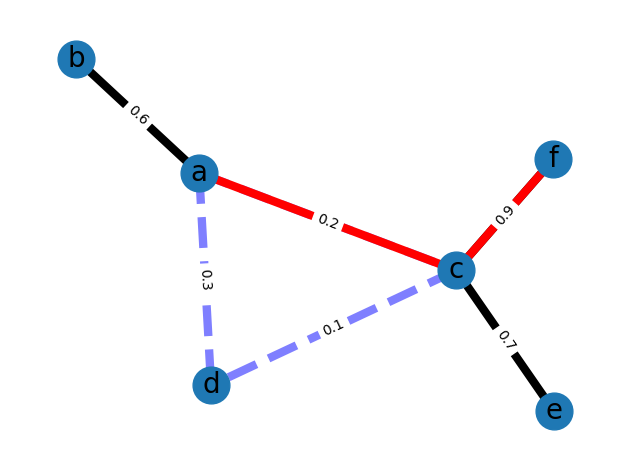

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)

shortest_path = nx.dijkstra_path(G, source="a", target="f", weight="weight")
print("Shortest path from a to f:", shortest_path)

path_edges = list(zip(shortest_path, shortest_path[1:]))

nx.draw_networkx_nodes(G, pos, node_size=700)

nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=6, edge_color="r")

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


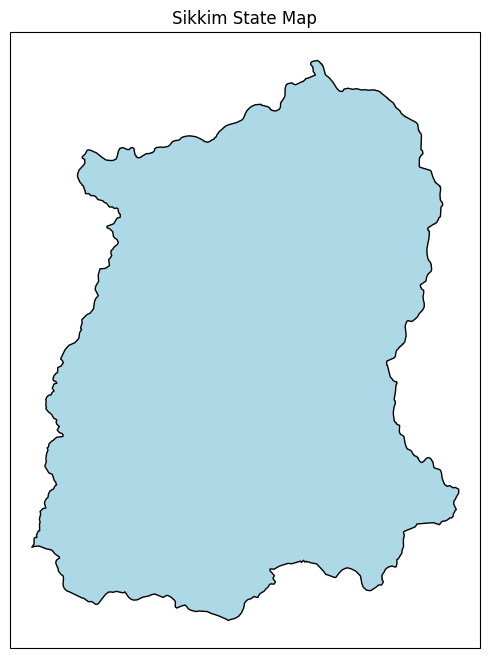

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import requests
import zipfile
import io

url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"

response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("gadm_IND")


india_states = gpd.read_file("gadm_IND/gadm41_IND_1.shp")


sikkim = india_states[india_states['NAME_1'] == 'Sikkim']


fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
sikkim.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ax.set_title("Sikkim State Map")
ax.coastlines()
plt.show()